In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
df = df.entry.apply(parse_log_entry)
import env

In [47]:
# get the dataframe from the codeup sql server
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)
df.head()

,entry
0,97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1,97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2,97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3,97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4,97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...


In [13]:
# entry is a column in the df
# the type is now 'object' instead of dataframe
df.entry

0        97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1        97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2        97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3        97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4        97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...
                               ...                        
13969    97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13970    97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13971    97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13972    97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13973    97.105.19.58 - - [17/Apr/2019:12:55:14 +0000] ...
Name: entry, Length: 13974, dtype: object

In [28]:
# this is the second row only of entry
df.entry[1]

'97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] "GET /api/v1/items HTTP/1.1" 200 3561 "-" "python-requests/2.21.0"'

In [15]:
# gives error because split can't be done this way to the entire series
# df.entry.split()

# we can use split one row at a time
# we can use apply() to split all rows one at a time
df.entry[1].split()

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/items',
 'HTTP/1.1"',
 '200',
 '3561',
 '"-"',
 '"python-requests/2.21.0"']

In [18]:
# lets practice with one row first
parts = df.entry[1].split()


# create an empty dictionary
output = {}

In [19]:
output['ip'] = parts[0]
output['ip']

'97.105.19.58'

In [22]:
# the 1 and the end of the replace argument is the number of occurrences to be replaced
# this only replaces the : between date and time, but not the : within time
# the [1:] prevents there from being a lonely [ at the front, with no matching ]
# the [1:] says that we want everything starting with the second characte (0 is first)
output['timestamp'] = parts[3][1:].replace(':',' ', 1)
output['timestamp']

'16/Apr/2019 19:34:42'

In [24]:
# the [1:] is added so that we get only the request method
# if we don't have the [1:], the output will instead be '"GET', with the extra "
# the [1:] says that we want everything starting with the second charactes (0 is first)
output['request_method'] = parts[5][1:]
output['request_method']

'GET'

In [29]:
output['request_path'] = parts[6]
output['request_path']

'/api/v1/items'

In [32]:
# [:-1] is added to get rid of an extra " at the end
# the :-1 is not inclusive of the last number, so the -1 element or " is not included
output['http_version'] = parts[7][:-1]
output['http_version']

'HTTP/1.1'

In [33]:
output['status_code'] = parts[8]
output['status_code']

'200'

In [34]:
output['size'] = int(parts[9])
output['size']

3561

In [35]:
# eplace('"', '') <- removes " by replacing them with nothing
output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
output['user_agent']

'python-requests/2.21.0'

In [36]:
# now put it all together and loop it
# this function parses an entry in the log data
def parse_log_entry(entry):
    # splits a string into an array
    parts = entry.split()
    # creates an entry dictionary
    output = {}
    output['ip'] = parts[0]
    # the 1 and the end of the replace argument is the number of occurrences to be replaced
    output['timestamp'] = parts[3][1:].replace(':',' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    
    return pd.Series(output)

In [48]:
# parse_log_entry(df.entry)
# this function call won't work because we instead need to
# apply the function to each row

df = df.entry.apply(parse_log_entry)
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [55]:
# this splits one column into two columns of data
# if expand=False ; then they are split but still in same column and seperated by a ,
request_path_params = df.request_path.str.split('?', expand=True)
# renaming columns, so that the names are better than 0 or 1
request_path_params.columns = ['request_path', 'request_params']
request_path_params

,request_path,request_params
0,/api/v1/sales,page=81
1,/api/v1/items,None
2,/api/v1/sales,page=82
3,/api/v1/sales,page=83
4,/api/v1/sales,page=84
...,...,...
13969,/api/v1/sales,page=62
13970,/api/v1/sales,page=65
13971,/api/v1/sales,page=73
13972,/api/v1/sales,page=69


In [57]:
# this drops the original column that we split,
# and then joins the two new columns that we created from the split
df = df.drop(columns='request_path').join(request_path_params)
df.head()

,ip,timestamp,request_method,http_version,status_code,size,user_agent,request_path,request_params
0,97.105.19.58,16/Apr/2019 19:34:42,GET,HTTP/1.1,200,512495,python-requests/2.21.0,/api/v1/sales,page=81
1,97.105.19.58,16/Apr/2019 19:34:42,GET,HTTP/1.1,200,3561,python-requests/2.21.0,/api/v1/items,None
2,97.105.19.58,16/Apr/2019 19:34:44,GET,HTTP/1.1,200,510103,python-requests/2.21.0,/api/v1/sales,page=82
3,97.105.19.58,16/Apr/2019 19:34:46,GET,HTTP/1.1,200,510003,python-requests/2.21.0,/api/v1/sales,page=83
4,97.105.19.58,16/Apr/2019 19:34:48,GET,HTTP/1.1,200,511963,python-requests/2.21.0,/api/v1/sales,page=84


<AxesSubplot:title={'center':'Top 10 requested pages'}>

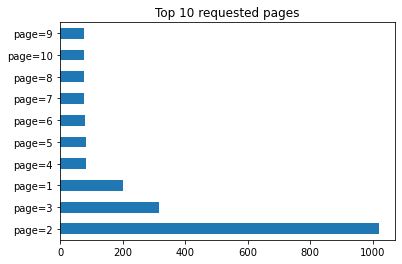

In [59]:
df.request_params.value_counts().head(10).plot.barh(title='Top 10 requested pages')

Intriguing that page requests are 2 > 3 > 1

In [61]:
# UTC is universal coordinated time
df.timestamp = pd.to_datetime(df.timestamp, utc=True)

# set index to datetime
df = df.set_index('timestamp')

df.head()

,ip,request_method,http_version,status_code,size,user_agent,request_path,request_params
timestamp,,,,,,,,
2019-04-16 19:34:42+00:00,97.105.19.58,GET,HTTP/1.1,200,512495,python-requests/2.21.0,/api/v1/sales,page=81
2019-04-16 19:34:42+00:00,97.105.19.58,GET,HTTP/1.1,200,3561,python-requests/2.21.0,/api/v1/items,None
2019-04-16 19:34:44+00:00,97.105.19.58,GET,HTTP/1.1,200,510103,python-requests/2.21.0,/api/v1/sales,page=82
2019-04-16 19:34:46+00:00,97.105.19.58,GET,HTTP/1.1,200,510003,python-requests/2.21.0,/api/v1/sales,page=83
2019-04-16 19:34:48+00:00,97.105.19.58,GET,HTTP/1.1,200,511963,python-requests/2.21.0,/api/v1/sales,page=84


In [64]:
# if we don't convert the tz then peak activity will appear to be late at night,
df = df.tz_convert('America/Chicago')
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()

df.head()

,ip,request_method,http_version,status_code,size,user_agent,request_path,request_params,hour,weekday
timestamp,,,,,,,,,,
2019-04-16 14:34:42-05:00,97.105.19.58,GET,HTTP/1.1,200,512495,python-requests/2.21.0,/api/v1/sales,page=81,14,Tuesday
2019-04-16 14:34:42-05:00,97.105.19.58,GET,HTTP/1.1,200,3561,python-requests/2.21.0,/api/v1/items,None,14,Tuesday
2019-04-16 14:34:44-05:00,97.105.19.58,GET,HTTP/1.1,200,510103,python-requests/2.21.0,/api/v1/sales,page=82,14,Tuesday
2019-04-16 14:34:46-05:00,97.105.19.58,GET,HTTP/1.1,200,510003,python-requests/2.21.0,/api/v1/sales,page=83,14,Tuesday
2019-04-16 14:34:48-05:00,97.105.19.58,GET,HTTP/1.1,200,511963,python-requests/2.21.0,/api/v1/sales,page=84,14,Tuesday


<AxesSubplot:title={'center':'Which hours are the most active?'}>

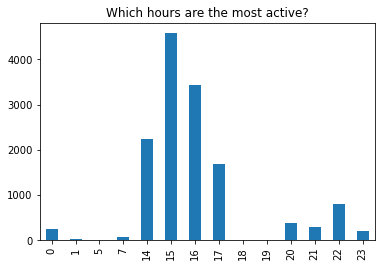

In [65]:
df.hour.value_counts().sort_index().plot.bar(title='Which hours are the most active?')

Peak activity is in the afternoon (probably during class)

In [66]:
df.groupby('hour').request_params.value_counts(normalize=True).sort_values()

hour  request_params           
14    page=99999999999999999998    0.000487
      page=999                     0.000487
      page=666                     0.000487
      page=1                       0.000974
      page=0                       0.001461
                                     ...   
23    page=3                       0.218978
      page=2                       0.218978
19    page=2                       0.500000
      page=3                       0.500000
1     page=1                       1.000000
Name: request_params, Length: 1618, dtype: float64

Some of the page numbers in hour 14 are outragiously large, possibly because students are experimenting to find the last page

In [67]:
df.groupby('request_params').hour.value_counts(normalize=True).sort_values()

request_params             hour
page=2                     7       0.000980
                           19      0.001961
page=3                     7       0.003175
                           19      0.006349
page=2                     20      0.009804
                                     ...   
page=1                     16      0.616915
page=0                     14      1.000000
page=999                   14      1.000000
page=666                   14      1.000000
page=99999999999999999998  14      1.000000
Name: hour, Length: 1618, dtype: float64

In [69]:
df.groupby('weekday').request_params.value_counts(normalize=True)

weekday    request_params
Tuesday    page=2            0.078970
           page=3            0.023129
           page=1            0.014257
           page=4            0.006495
           page=5            0.006416
                               ...   
Wednesday  page=95           0.003185
           page=96           0.003185
           page=97           0.003185
           page=98           0.003185
           page=99           0.003185
Name: request_params, Length: 370, dtype: float64